In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from google.colab import files
from functools import reduce

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
files.upload()

Saving df30min (1).csv to df30min (1) (1).csv


{'df30min (1).csv': b'\xef\xbb\xbfdatetime,T-1,T-2,T-3,T-4,T-6,T-7,T-8,T-9,T-10,T-11,T-12,T-13,T-14,T-15,T-16,T-17,T-18,T-19,T-20,T-21,T-22,T-23,T-24,T-25,T-26,T-27,T-29,T-30,T-31,T-32,T-33,T-34,T-35,T-36,T-37,T-38,T-39,T-40,T-41,T-42,T-43,T-44,T-45,T-46,T-47,T-48,T-49,T-50,T-51,T-52,T-53,T-54,L-1,L-2,L-3,L-4,L-6,L-7,L-8,L-9,L-10,L-11,L-12,L-13,L-14,L-15,L-16,L-17,L-18,L-19,L-20,L-21,L-22,L-23,L-24,L-25,L-26,L-27,L-29,L-30,L-31,L-32,L-33,L-34,L-35,L-36,L-37,L-38,L-39,L-40,L-41,L-42,L-43,L-44,L-45,L-46,L-47,L-48,L-49,L-50,L-51,L-52,L-53,L-54,H-1,H-2,H-3,H-4,H-6,H-7,H-8,H-9,H-10,H-11,H-12,H-13,H-14,H-15,H-16,H-17,H-18,H-19,H-20,H-21,H-22,H-23,H-24,H-25,H-26,H-27,H-29,H-30,H-31,H-32,H-33,H-34,H-35,H-36,H-37,H-38,H-39,H-40,H-41,H-42,H-43,H-44,H-45,H-46,H-47,H-48,H-49,H-50,H-51,H-52,H-53,H-54,V-1,V-2,V-3,V-4,V-6,V-7,V-8,V-9,V-10,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-29,V-30,V-31,V-32,V-33,V-34,V-35,V-36,V-37,V-38,V-39,V-40,V-41,V-42,V-43,V-44

In [ ]:
#df = pd.read_csv('intel_preprocessed(1).csv')
df = pd.read_csv('df30min (1).csv')
#df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"]) 
#df["datetime"] = pd.to_datetime(df["datetime"])
#df = df["2004-03-01":"2004-03-7"] # filtered out first week for further processing, since later data seems bit weird
#df_day = pd.read_csv('df_week_2004-03-01.csv')

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")
df = df["2004-03-01":"2004-03-07"] # filtered out first week for further processing, since later data seems bit weird
#X = df[df["datetime"].dt.date == pd.to_datetime(f"2004-03-01")].loc[:, df.columns != "T-43"].drop(columns=["datetime"])
#y = df[df["datetime"].dt.date == pd.to_datetime(f"2004-03-01")]["T-43"]

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df = df.dropna(how="all")
df = df.dropna(thresh=int(54*4*0.8))
df = df.dropna(axis=1, thresh=len(df.index) - 10)
df = df.interpolate(method="bfill", axis=1)

In [ ]:
df.head(25)

T-1        T-2        T-3        T-4        T-6  \
datetime                                                                     
2004-03-01 00:00:00  18.400423  18.828516  18.733109  19.077980  18.637885   
2004-03-01 00:30:00  18.330137  18.734668  18.644852  18.987127  18.533590   
2004-03-01 01:00:00  18.242986  18.655000  18.567400  18.902189  18.437694   
2004-03-01 01:30:00  18.147485  18.551475  18.475431  18.813761  18.340775   
2004-03-01 02:00:00  18.041467  18.460354  18.384385  18.718724  18.267211   
2004-03-01 02:30:00  17.978824  18.380670  18.303023  18.639769  18.180720   
2004-03-01 03:00:00  17.956533  18.336556  18.282500  18.726330  18.318200   
2004-03-01 03:30:00  17.891527  18.288862  18.232240  18.600219  18.145216   
2004-03-01 04:00:00  17.783120  18.187590  18.110547  18.460268  18.010667   
2004-03-01 04:30:00  17.704650  18.091633  18.065920  18.500810  18.044080   
2004-03-01 05:00:00  17.562523  17.976600  17.935300  18.295513  17.856900   
2004-03-01 05:30:00  17.445440  17.850367  17.829059  18.184972  17.762575   
2004-03-01 06:00:00  17.376820  17.767809  17.819254  18.278606  17.824304   
2004-03-01 06:30:00  17.257295  17.717637  17.716347  18.090969  17.692587   
2004-03-01 07:00:00  20.228228  20.252088  21.252600  21.800509  20.452409   
2004-03-01 07:30:00  20.982302  21.002542  21.973213  22.908800  21.362428   
2004-03-01 08:00:00  21.123496  21.224982  22.240249  23.008978  21.621436   
2004-03-01 08:30:00  21.276655  21.753625  22.702347  23.230346  21.965634   
2004-03-01 09:00:00  21.554595  21.962655  22.861623  23.504582  22.190843   
2004-03-01 09:30:00  22.053167  22.318280  23.233180  23.845776  22.507408   
2004-03-01 10:00:00  22.344958  22.716720  23.594355  24.203312  22.876264   
2004-03-01 10:30:00  22.340585  22.710995  23.605213  23.737308  22.695506   
2004-03-01 11:00:00  22.719732  22.840506  23.716186  23.932021  22.908450   
2004-03-01 11:30:00  23.842535  23.094205  24.089700  24.309920  23.349800   
2004-03-01 12:00:00  24.701972  23.511103  24.551589  24.709132  23.756287   

                           T-7        T-8        T-9       T-10       T-11  \
datetime                                                                     
2004-03-01 00:00:00  18.671868  18.359694  18.458541  18.411952  17.866000   
2004-03-01 00:30:00  18.591811  18.276495  18.374753  18.349078  17.578317   
2004-03-01 01:00:00  18.495533  18.195306  18.292684  18.266437  17.419750   
2004-03-01 01:30:00  18.419583  18.105535  18.205267  18.162231  17.312662   
2004-03-01 02:00:00  18.326937  18.009554  18.115511  18.067600  17.213162   
2004-03-01 02:30:00  18.256658  17.938182  18.038853  18.009097  17.123533   
2004-03-01 03:00:00  18.548325  18.007493  18.206900  18.170500  17.069960   
2004-03-01 03:30:00  18.275096  17.915988  18.057800  18.002920  16.991085   
2004-03-01 04:00:00  18.094452  17.762535  17.879562  17.836724  16.856250   
2004-03-01 04:30:00  18.311658  17.766600  17.981941  17.944655  16.804012   
2004-03-01 05:00:00  17.986400  17.614790  17.735174  17.707240  16.700080   
2004-03-01 05:30:00  17.916244  17.504890  17.639809  17.644611  16.581640   
2004-03-01 06:00:00  18.185776  17.588489  17.821667  17.843289  16.521378   
2004-03-01 06:30:00  17.868072  17.435806  17.578491  17.607000  16.453570   
2004-03-01 07:00:00  20.987637  20.281560  20.762320  20.655138  20.842581   
2004-03-01 07:30:00  22.005240  21.450840  21.598303  21.251681  21.886897   
2004-03-01 08:00:00  22.272013  21.737858  21.874768  21.440559  22.053185   
2004-03-01 08:30:00  22.626952  22.085906  22.122259  21.903903  22.395741   
2004-03-01 09:00:00  22.827532  22.333736  22.336480  22.159100  22.619700   
2004-03-01 09:30:00  23.192400  22.752306  22.711439  22.553849  22.982496   
2004-03-01 10:00:00  23.535630  23.114600  23.193490  22.963313  23.345145   
2004-03-01 10:30:00  23.526000  22.909780  23.212600  22.705287  23.366406   
2004-03-01 11:00:00  23.768009  23.174333  23.56

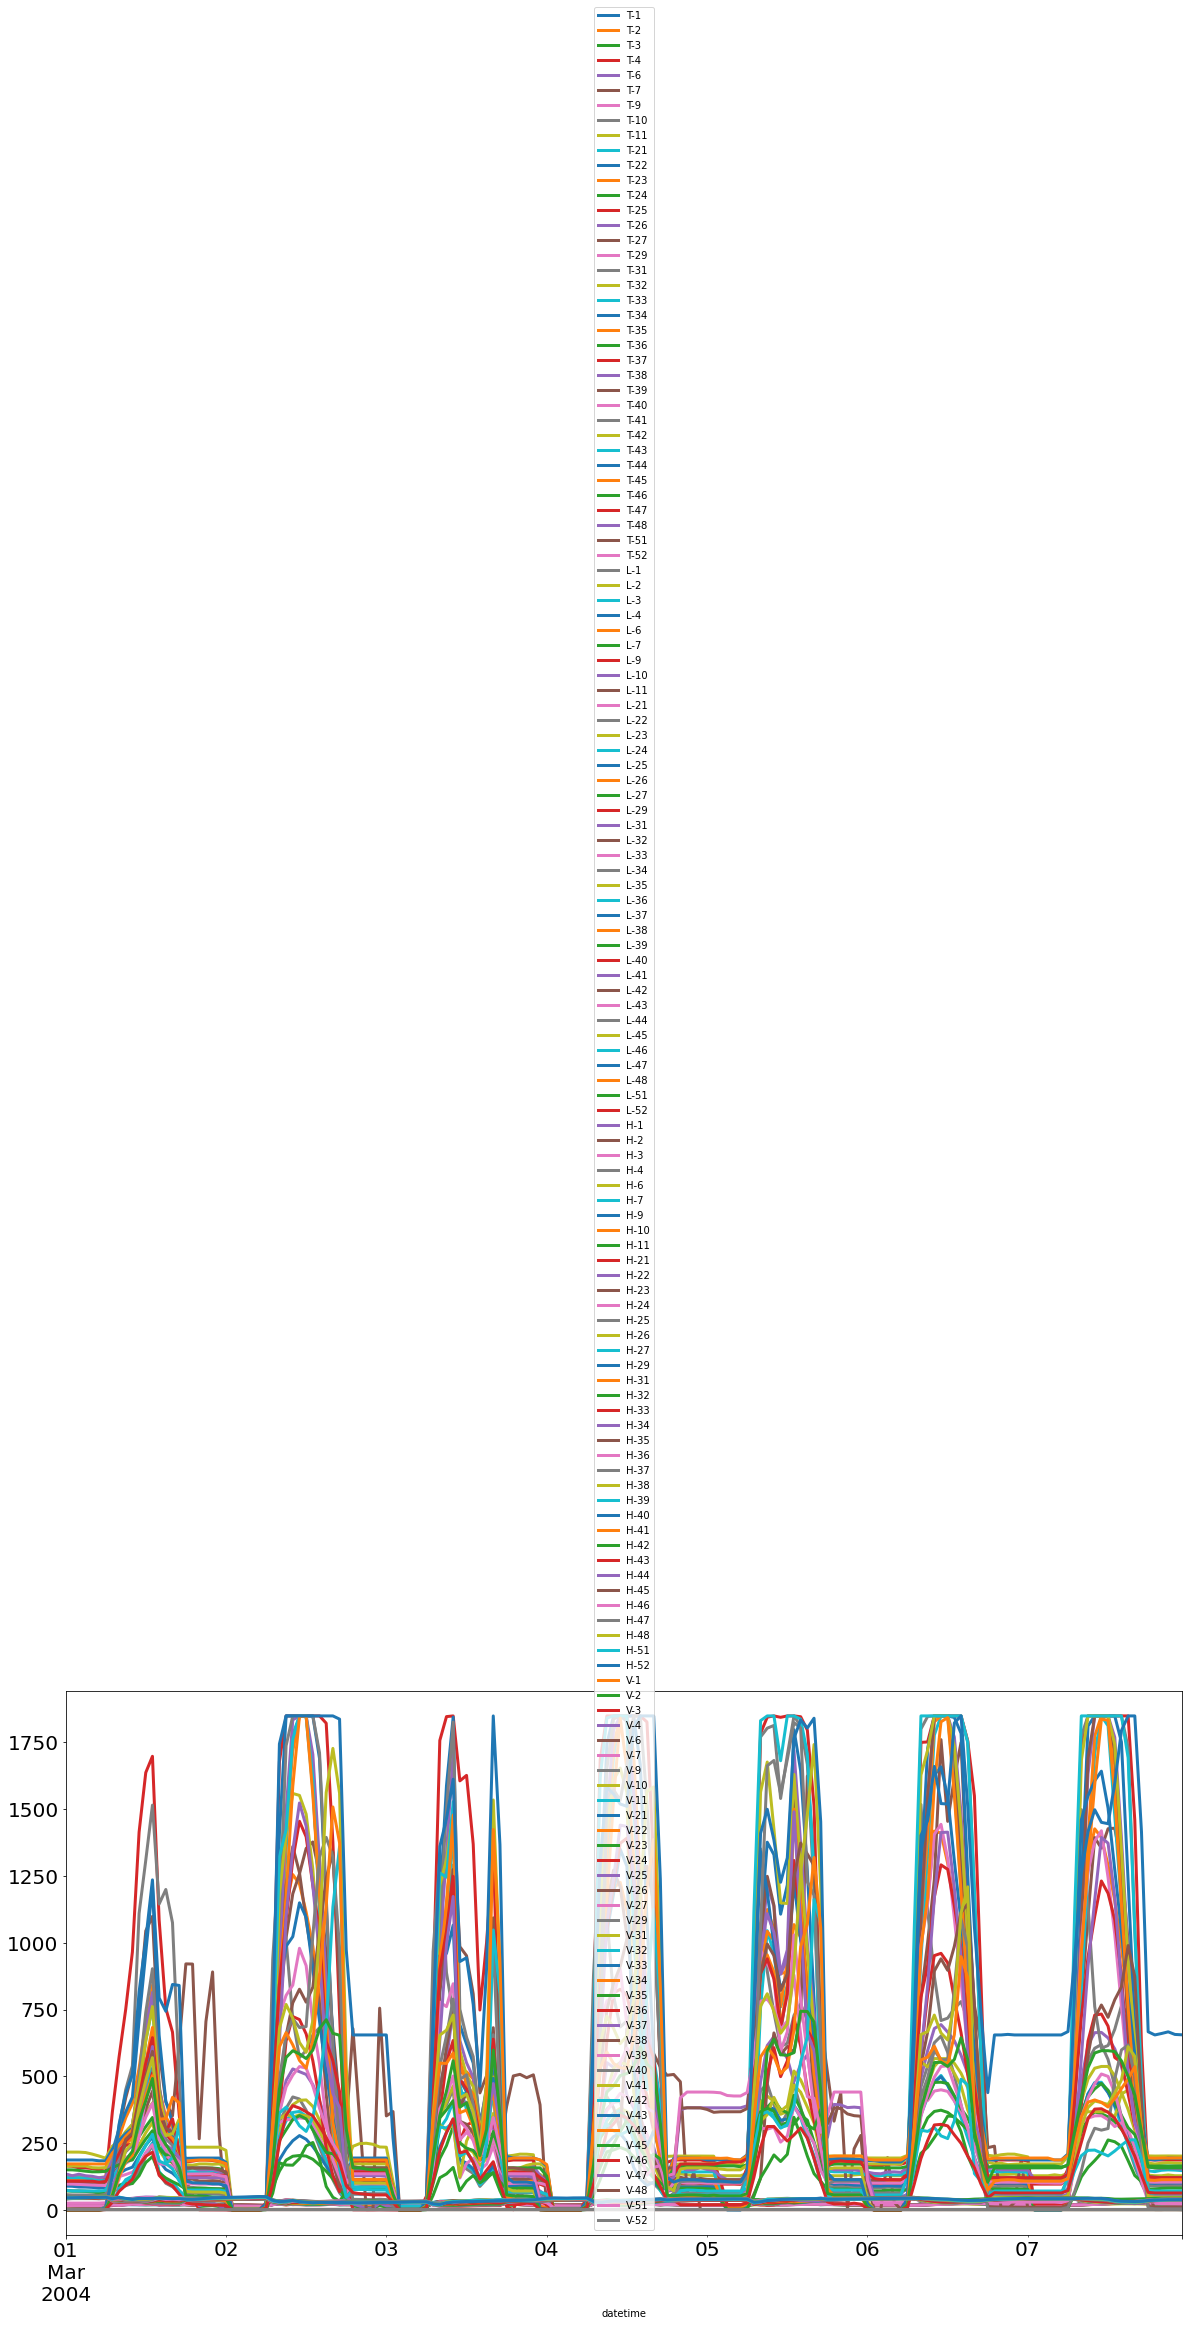

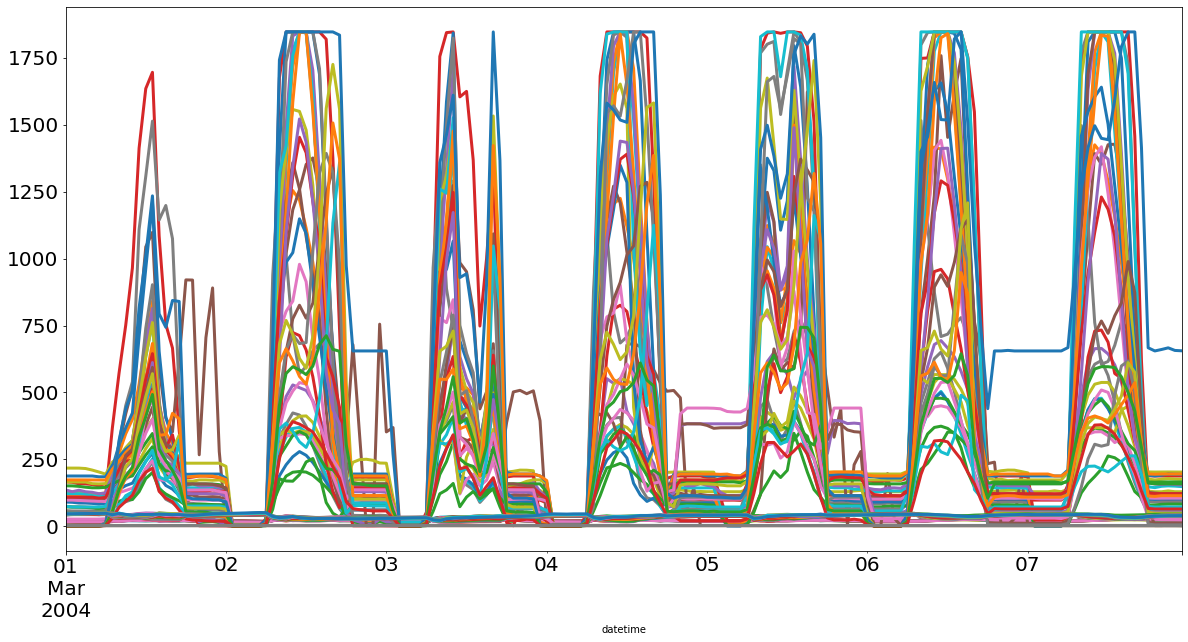

In [ ]:
ax = df.plot(figsize=(20,10), linewidth=3, fontsize = 20)
ax.get_legend().remove()

In [ ]:
df.head()

T-1        T-2        T-3        T-4        T-6  \
datetime                                                                     
2004-03-01 00:00:00  18.358691  18.782119  18.690359  19.031993  18.592539   
2004-03-01 01:00:00  18.192155  18.608472  18.519576  18.858581  18.380961   
2004-03-01 02:00:00  18.009678  18.421561  18.341767  18.676542  18.211152   
2004-03-01 03:00:00  17.928270  18.310059  18.261558  18.665400  18.224187   
2004-03-01 04:00:00  17.748244  18.139034  18.087910  18.479318  18.024589   

                           T-7        T-9       T-10       T-11       T-21  \
datetime                                                                     
2004-03-01 00:00:00  18.629933  18.416088  18.377129  17.710803  18.603402   
2004-03-01 01:00:00  18.458709  18.242389  18.218800  17.365267  18.250900   
2004-03-01 02:00:00  18.293865  18.080667  18.037434  17.167658  17.976626   
2004-03-01 03:00:00  18.416770  18.119194  18.085496  17.025083  17.745109   
2004-03-01 04:00:00  18.205184  17.926414  17.889884  16.828390  17.464754   

                     ...      V-41      V-42      V-43      V-44      V-45  \
datetime             ...                                                     
2004-03-01 00:00:00  ...  2.633337  2.634449  2.643454  2.636882  2.643778   
2004-03-01 01:00:00  ...  2.631105  2.631541  2.639651  2.632410  2.640579   
2004-03-01 02:00:00  ...  2.627509  2.627589  2.638719  2.628996  2.637441   
2004-03-01 03:00:00  ...  2.626822  2.625610  2.636723  2.627816  2.635569   
2004-03-01 04:00:00  ...  2.624335  2.621123  2.632603  2.625183  2.631813   

                         V-46      V-47      V-48      V-51      V-52  
datetime                                                               
2004-03-01 00:00:00  2.481640  2.634992  2.652279  2.646088  2.620488  
2004-03-01 01:00:00  2.479797  2.631968  2.651642  2.644063  2.618173  
2004-03-01 02:00:00  2.475367  2.628723  2.651090  2.641611  2.614643  
2004-03-01 03:00:00  2.474770  2.628202  2.650147  2.639499  2.612879  
2004-03-01 04:00:00  2.474671  2.625160  2.648078  2.636102  2.610269  

[5 rows x 148 columns]

In [ ]:
y = df["H-26"]
X = df.loc[:, df.columns != "H-26"]
#X = df.loc[:, df.columns != "H-26"].drop(columns=["datetime"])
#df = df.loc[:, df.columns != "H-26"].drop(columns=["datetime"])

In [ ]:
# center and scale & save mean and std for Y
df_mean = df.mean()
df_std = df.std()
X = (df - df.mean()) / df.std() 

In [ ]:
def pls_calibrate(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Fit to the entire dataset
    pls.fit(X, y)
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=2)

    # Calculate scores
    r2 = r2_score(y, y_cv)

    mse = mean_squared_error(y, y_cv)
    rmse = np.sqrt(mse)

    rpd = y.std()/np.sqrt(mse) # relative percent deviation
    
    b = pls.coef_
    
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    ##

    # Calculate scores calibration
    r2 = r2_score(y, y_c)
    mse = mean_squared_error(y, y_c)
    rmse = np.sqrt(mse)
    rpd = y.std()/np.sqrt(mse)
    
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=20)

    # Calculate scores crossvalidation
    r2_cv = r2_score(y, y_cv)
    mse_cv = mean_squared_error(y, y_cv)
    rmse_cv = np.sqrt(mse_cv)

    # Get X scores
    T = pls.x_scores_
    # Get X loadings
    P = pls.x_loadings_
    
    # Calculate error array
    Err = X - np.dot(T,P.T)
    
    # Calculate Q-residuals (sum over the rows of the error array)
    Q = np.sum(Err**2, axis=1)
    
    # Calculate Hotelling's T-squared (note that data are normalised by default)
    Tsq = np.sum((pls.x_scores_/np.std(pls.x_scores_, axis=0))**2, axis=1)
    #
    TSSRes = np.sum((y - y.mean()) ** 2)
    PRESS = np.sum((y_cv - y_c) ** 2)
    q2 = 1 - PRESS / TSSRes 
    #

    ##
 

    
    return (y_c, y_cv, r2, mse, rpd, rmse, r2_cv, mse_cv, rmse_cv, b, q2, Tsq, Q, Err, P, T) 

In [ ]:
# function for plots

def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), 'o-', color='blue', mfc='blue')
        #if objective=='min':
        #    idx = np.argmin(vals)
        #else:
        #    idx = np.argmax(vals)
        #plt.plot(xticks[idx], np.array(vals)[idx], 'o', ms=15, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')
        #plt.title(ylabel)

    plt.show()

In [ ]:
day = 72  #number of row splitted

X_train = X.iloc[:-day, :]
X_test = X.iloc[-day:]
y_train = y.iloc[:-day]
y_test = y.iloc[-day:]

        # Scale
X_train_mean = X_train.mean()
X_train_std = X_train.std()
y_train_mean = y_train.mean()
y_train_std = y_train.std()


X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std
y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std

Model calibration with train data

In [ ]:
##### calibration

#calibration
r2s = []
mses = []
rmses = []
#cross validation
r2s_cv = []
mses_cv = []
rmses_cv = []
rpds = []
q2s = []
beta_coefficients = []

# test with 20 components
comp = np.arange(1, 21)
xticks = np.arange(1, 21, step = 1) #number of components
for n_comp in xticks:
    y_c, y_cv, r2, mse, rpd, rmse, r2_cv, mse_cv, rmse_cv, b, q2, Tsq, Q, Err, P, T = pls_calibrate(X_train, y_train, n_comp)
    ##

    #
    r2s.append(r2)
    mses.append(mse)
    rmses.append(rmse)

    r2s_cv.append(r2_cv)
    mses_cv.append(mse_cv)
    rmses_cv.append(rmse_cv)
    q2s.append(q2)

    rpds.append(rpd)
    #pls.fit(X_test, y_test)
    beta_coefficients.append(b)
    
    #beta_coefficients.append(pls.coef_.squeeze())


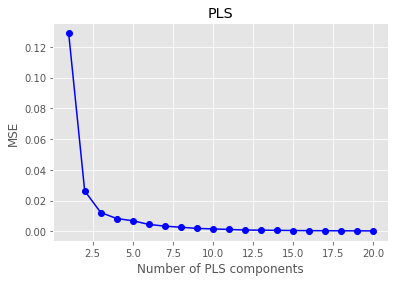

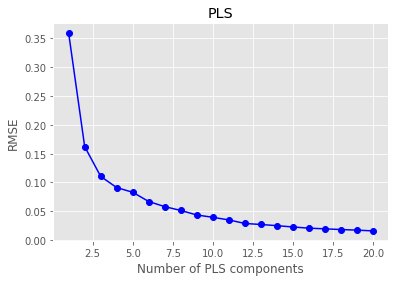

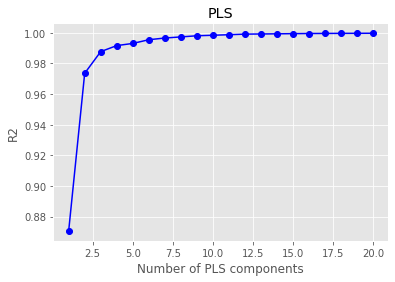

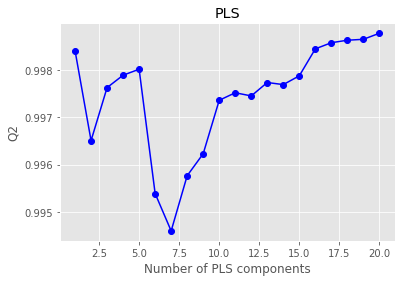

In [ ]:
#fig, axes = plt.subplots(3, 2, figsize=(10, 3))
plot_metrics(mses, 'MSE', 'min')
plot_metrics(rmses, 'RMSE', 'min')
plot_metrics(r2s, 'R2', 'max')
plot_metrics(q2s, 'Q2', 'max')


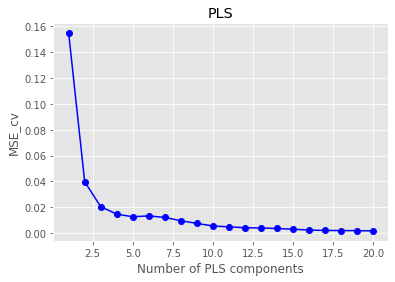

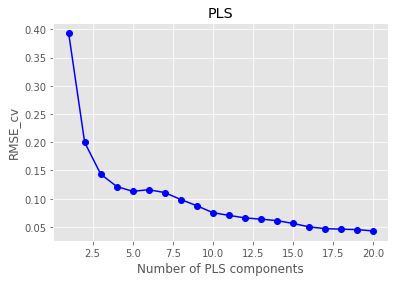

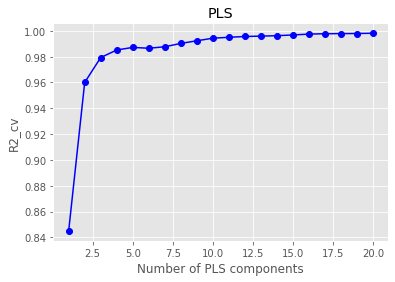

In [ ]:
plot_metrics(mses_cv, 'MSE_cv', 'min')
plot_metrics(rmses_cv, 'RMSE_cv', 'min')
plot_metrics(r2s_cv, 'R2_cv', 'max')

In [ ]:
len(X)

334

R2: 0.9984, MSE: 0.0016, RMSE: 0.0395, RPD: 25.3054


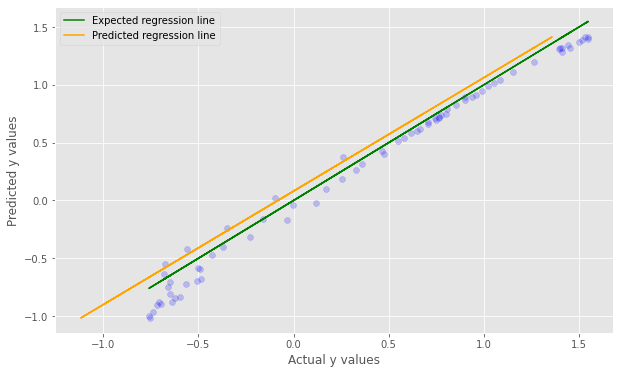

In [ ]:
# choose number of components and apply it to test data
# 3 chosen
y_c, y_cv, r2, mse, rpd, rmse, r2_cv, mse_cv, rmse_cv, b, q2s, Tsq, Q, Err, P, T  = pls_calibrate(X_train, y_train, 10)
print('R2: %0.4f, MSE: %0.4f, RMSE: %0.4f, RPD: %0.4f' %(r2, mse, rmse, rpd))

pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)
y_cf = pls.predict(X_test)

plt.figure(figsize=(10, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_cf, color='blue', alpha=0.2) ### cv
    #plt.plot(y, y, '-g', label='Expected regression line')
    plt.plot(list(y_test), list(y_test), '-g', label='Expected regression line') #Plot the ideal 1:1 line
    z = np.polyfit(list(y_test), list(y_cf), 1)
    plt.plot(np.polyval(list(z), list(y_cf)), list(y_cf), color='orange', label='Predicted regression line') #Plot the best fit line
    plt.xlabel('Actual y values')
    plt.ylabel('Predicted y values')
    plt.legend()
    plt.plot()

In [ ]:
r2_cf = r2_score(y_test, y_cf)
mse_cf = mean_squared_error(y_test, y_cf)
rmse_cf = np.sqrt(mse_cf)


print('R2 CV: %5.3f'  % r2_cf)
print('MSE calib: %5.3f' % mse_cf)
print('MSE CV: %5.3f' % rmse_cf)


R2 CV: 0.978
MSE calib: 0.013
MSE CV: 0.115


In [ ]:
X_test.index

DatetimeIndex(['2004-03-06 08:00:00', '2004-03-06 09:00:00',
               '2004-03-06 10:00:00', '2004-03-06 11:00:00',
               '2004-03-06 12:00:00', '2004-03-06 13:00:00',
               '2004-03-06 14:00:00', '2004-03-06 15:00:00',
               '2004-03-06 16:00:00', '2004-03-06 17:00:00',
               '2004-03-06 18:00:00', '2004-03-06 19:00:00',
               '2004-03-06 20:00:00', '2004-03-06 21:00:00',
               '2004-03-06 22:00:00', '2004-03-06 23:00:00',
               '2004-03-07 00:00:00', '2004-03-07 01:00:00',
               '2004-03-07 02:00:00', '2004-03-07 03:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)

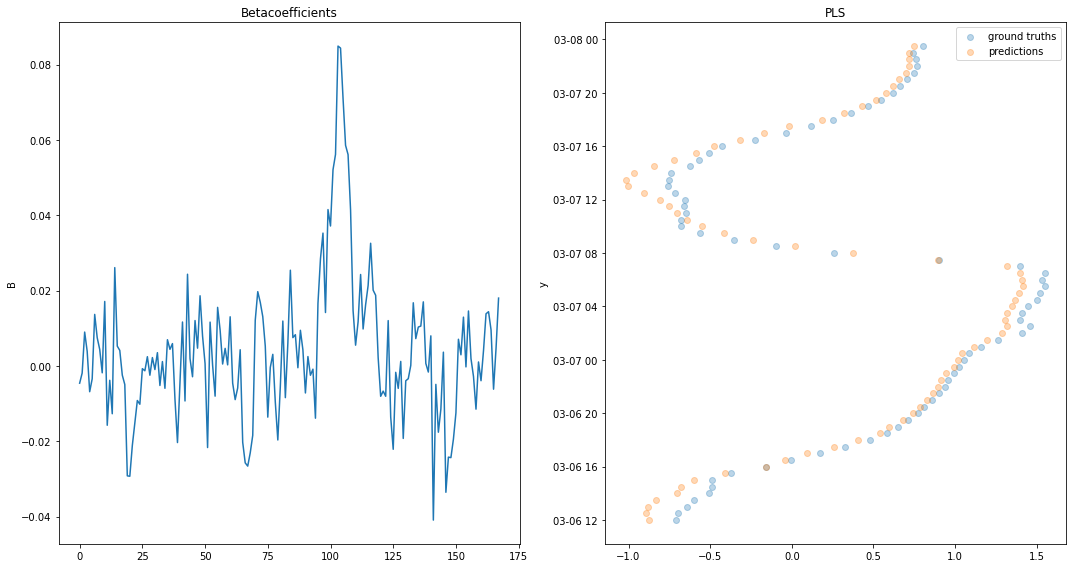

In [ ]:

#pls = PLSRegression(n_components=1) # get parameters weights, betacoeffs, loadings
#pls.fit(X_train, y_train) #fit parameters to create fitted model

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].plot( b, label="")
axes[0].set(xlabel="", ylabel="B", title="Betacoefficients")
axes[1].scatter(y_test, X_test.index, alpha=0.3, label="ground truths")
axes[1].scatter(y_cf, X_test.index, alpha=0.3, label="predictions"
)
axes[1].set(xlabel="", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
labels= df.columns.values.astype('str') 
labels

array(['T-1', 'T-2', 'T-3', 'T-4', 'T-6', 'T-7', 'T-9', 'T-10', 'T-11',
       'T-21', 'T-22', 'T-23', 'T-24', 'T-25', 'T-26', 'T-27', 'T-29',
       'T-31', 'T-32', 'T-33', 'T-34', 'T-35', 'T-36', 'T-37', 'T-38',
       'T-39', 'T-40', 'T-41', 'T-42', 'T-43', 'T-44', 'T-45', 'T-46',
       'T-47', 'T-48', 'T-51', 'T-52', 'L-1', 'L-2', 'L-3', 'L-4', 'L-6',
       'L-7', 'L-9', 'L-10', 'L-11', 'L-21', 'L-22', 'L-23', 'L-24',
       'L-25', 'L-26', 'L-27', 'L-29', 'L-31', 'L-32', 'L-33', 'L-34',
       'L-35', 'L-36', 'L-37', 'L-38', 'L-39', 'L-40', 'L-41', 'L-42',
       'L-43', 'L-44', 'L-45', 'L-46', 'L-47', 'L-48', 'L-51', 'L-52',
       'H-1', 'H-2', 'H-3', 'H-4', 'H-6', 'H-7', 'H-9', 'H-10', 'H-11',
       'H-21', 'H-22', 'H-23', 'H-24', 'H-25', 'H-26', 'H-27', 'H-29',
       'H-31', 'H-32', 'H-33', 'H-34', 'H-35', 'H-36', 'H-37', 'H-38',
       'H-39', 'H-40', 'H-41', 'H-42', 'H-43', 'H-44', 'H-45', 'H-46',
       'H-47', 'H-48', 'H-51', 'H-52', 'V-1', 'V-2', 'V-3', 'V-4', 'V-6',


TypeError: ignored

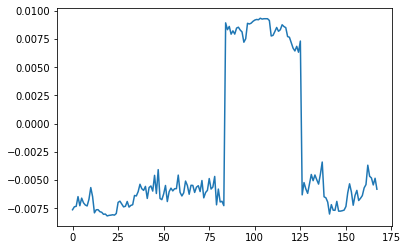

In [ ]:
labels= df.columns.values.astype('str') 
for i in range (0,3):
  c = np.array(beta_coefficients[i])
  plt.plot(c)
  plt.xticks(c, labels, rotation='vertical')
  plt.xlabel('variables')
  plt.ylabel('Beta coefficients')